### Feature Extraction with Eigen Face

In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import cv2

## Eigen Face
from sklearn.decomposition import PCA
import pickle


In [2]:
# Load data 
data = pickle.load(open('data/data_images_100_100.pickle', mode='rb'))

In [3]:
# data.head()

### Eigen Face


In [4]:
# Mean Face
X = data.drop('gender', axis=1).values

In [5]:
X.shape

(5608, 10000)

In [6]:
mean_face = X.mean(axis=0) #flatten mean face
mean_face.shape

(10000,)

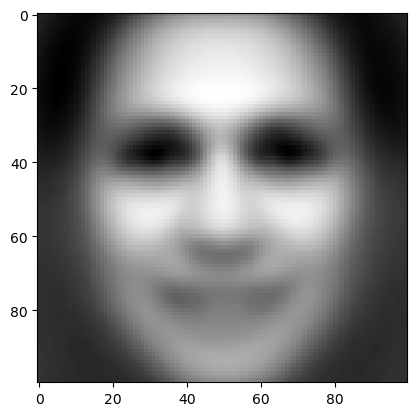

In [7]:
# visualize mean face
plt.imshow(mean_face.reshape(100,100), cmap = 'gray')
plt.show()

**Subtract data with mean face**

In [8]:
X_t = X - mean_face # transformed data

**Apply X_t data to PCA**
- Find the right number of component - Elbow
- With right number compnent computer Principal components

In [9]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [10]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1, len(exp_var_df)+1)

# exp_var_df.head()

In [11]:
exp_var_df.set_index('principal_components', inplace=True)

<Axes: xlabel='principal_components'>

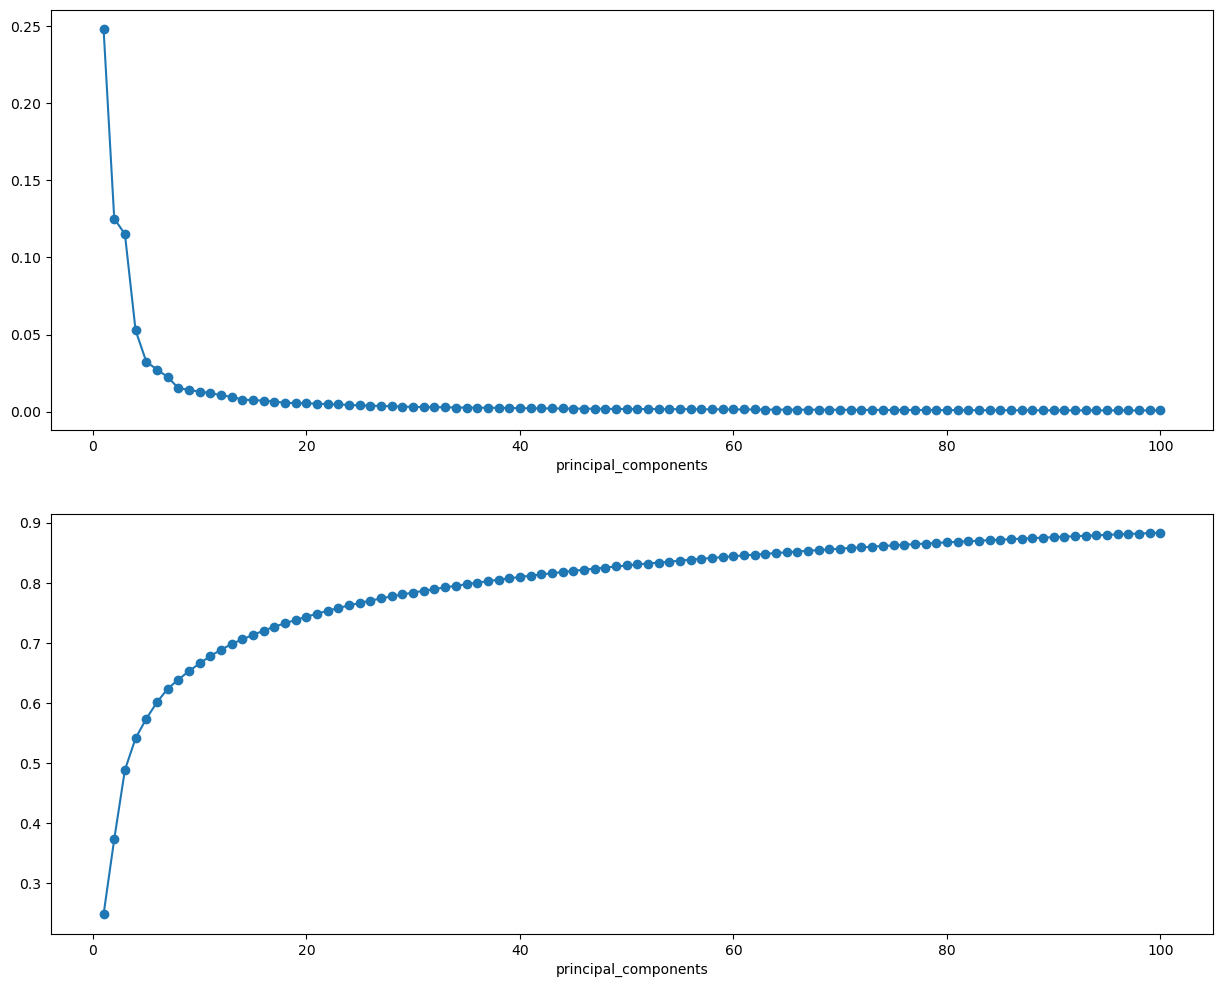

In [12]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2, figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line', marker='o', ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line', marker='o', ax=ax[1])

From above plot, it is clear that with approximately 50 principal components having 80% coverage.

In [13]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [14]:
pca_data.shape

(5608, 50)

In [15]:
# saving data and models
y = data['gender'].values
np.savez('./data/data_pca_50_target', pca_data, y)

In [16]:
# saving data and model
pca_dict = {
    'pca': pca_50,
    'mean_face': mean_face
}

In [17]:
pickle.dump(pca_dict, open('model/pca_dict.pickle', 'wb'))

## Visualize Eigen Image

In [34]:
# inverse data
pca_data_inv =  pca_50.inverse_transform(pca_data)

In [35]:
pca_data_inv.shape

(5608, 10000)

In [36]:
eig_img = pca_data_inv[0, :].reshape((100,100))
eig_img.shape

(100, 100)

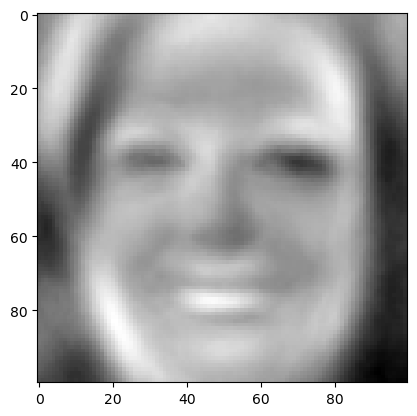

In [37]:
plt.imshow(eig_img, cmap='gray')
plt.show()

## Test

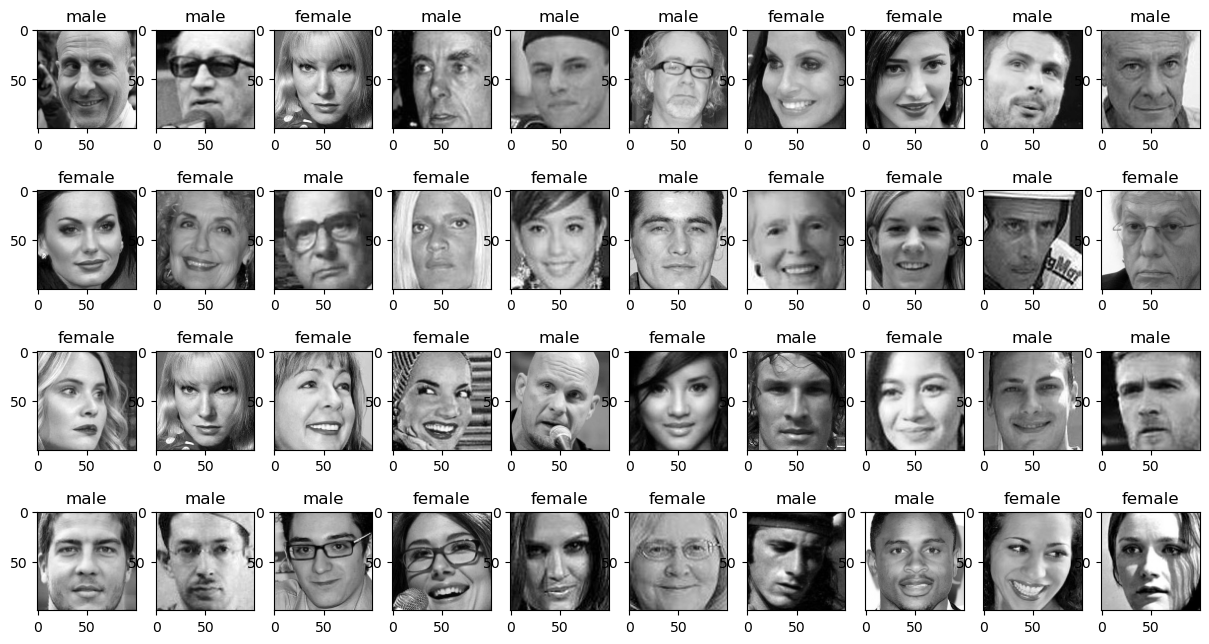

====================Eigen Images====================


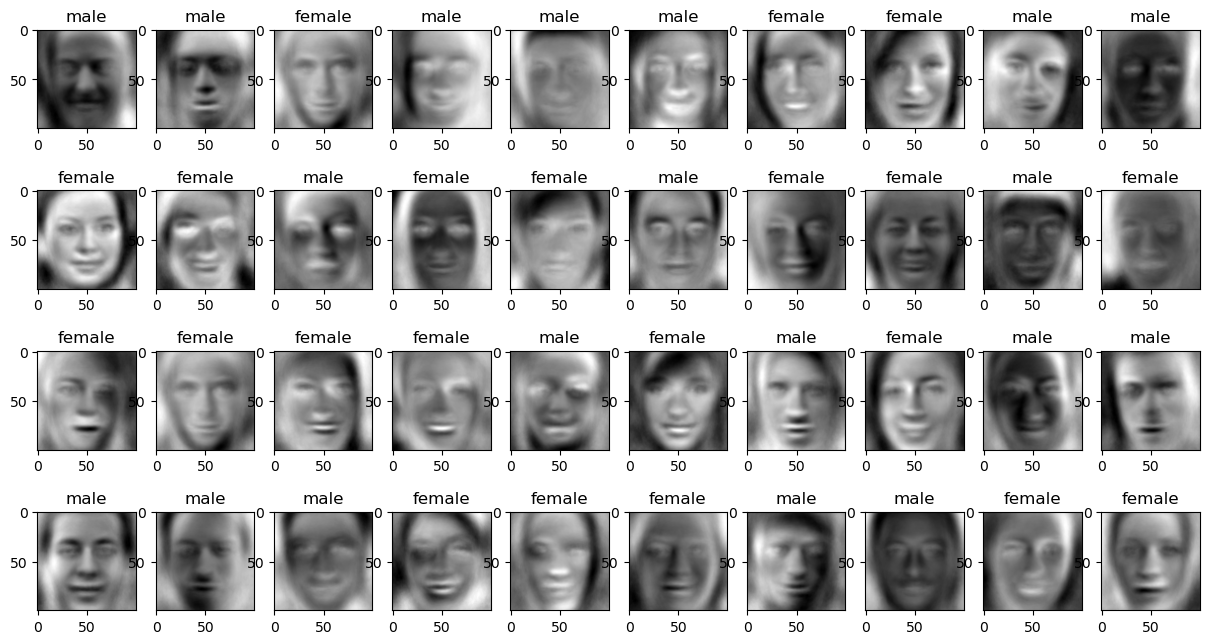

In [39]:
np.random.seed(123)

pics = np.random.randint(0, 5608, 40)
plt.figure(figsize=(15, 8))

for i, pic in enumerate(pics):
    plt.subplot(4, 10, i+1)
    img = X[pic:pic+1].reshape((100,100))
    plt.imshow(img, cmap='gray')
    plt.title(f"{y[pic]}")
plt.show()

print("="*20+"Eigen Images"+"="*20)
plt.figure(figsize=(15, 8))

for i, pic in enumerate(pics):
    plt.subplot(4, 10, i+1)
    img = pca_data_inv[pic:pic+1].reshape((100, 100))
    plt.imshow(img, cmap='gray')
    plt.title(f"{y[pic]}")
plt.show()